In [33]:
# SVM Classification
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score



In [2]:
salary_train=pd.read_csv(r"C:\Users\ADITYA\Desktop\EXCELR ASSIGNMENT\SVM\SalaryData_Train(1).csv")

In [3]:
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
salary_train.shape

(30161, 14)

In [5]:
salary_test=pd.read_csv(r"C:\Users\ADITYA\Desktop\EXCELR ASSIGNMENT\SVM\SalaryData_Test(1).csv")

In [6]:
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [7]:
salary_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [8]:
salary_test.shape

(15060, 14)

In [9]:
salary_train.workclass.value_counts()

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

In [27]:
salary_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [10]:
print('colums of a salry_train data are : {}'.format(salary_train.columns))
print('colums of a salry_train data are : {}'.format(salary_test.columns))

colums of a salry_train data are : Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')
colums of a salry_train data are : Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')


In [11]:
string_col=['workclass','education','maritalstatus','occupation','relationship','race','sex','native']

In [12]:
string_col

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

# Exploratory Data Analysis

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 [Text(0.5, 0, 'age'),
  Text(1.5, 0, 'workclass'),
  Text(2.5, 0, 'education'),
  Text(3.5, 0, 'educationno'),
  Text(4.5, 0, 'maritalstatus'),
  Text(5.5, 0, 'occupation'),
  Text(6.5, 0, 'relationship'),
  Text(7.5, 0, 'race'),
  Text(8.5, 0, 'sex'),
  Text(9.5, 0, 'capitalgain'),
  Text(10.5, 0, 'capitalloss'),
  Text(11.5, 0, 'hoursperweek'),
  Text(12.5, 0, 'native')])

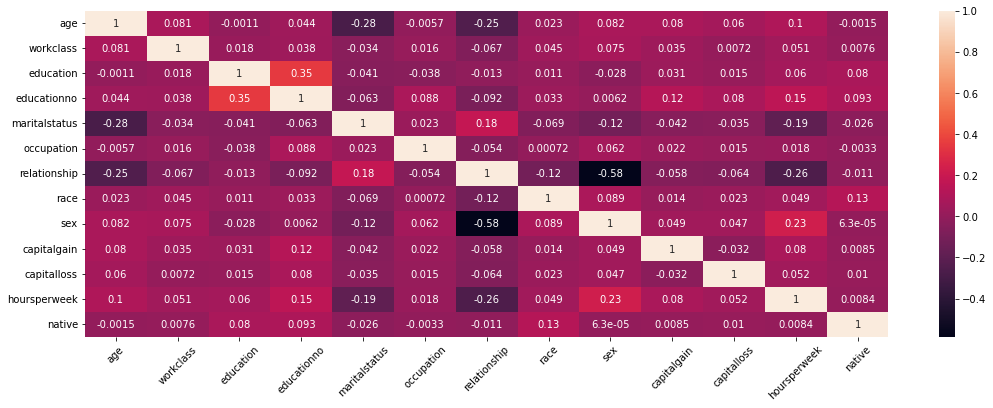

In [34]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(salary_train.corr(), annot=True);
plt.xticks(rotation=45)

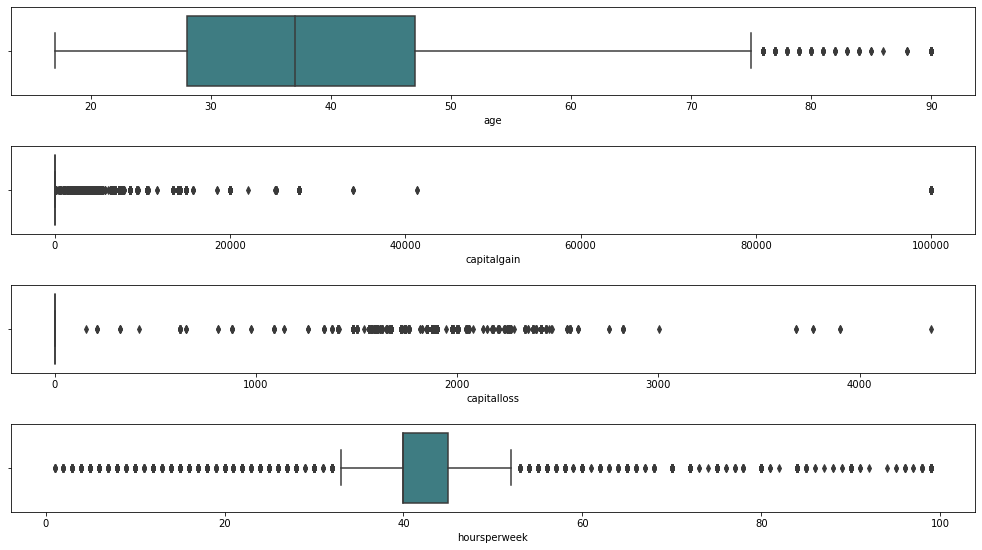

In [35]:
ot=salary_train.copy() 
fig, axes=plt.subplots(4,1,figsize=(14,8),sharex=False,sharey=False)
sns.boxplot(x='age',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='capitalgain',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='capitalloss',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='hoursperweek',data=ot,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

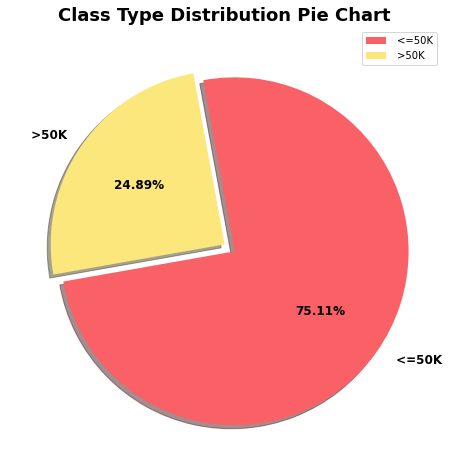

In [36]:
plt.figure(figsize = (12,8))
plt.pie(salary_train['Salary'].value_counts(),
       labels=salary_train.Salary.unique(),
       explode = [0.07,0.0],
       autopct= '%.2f%%',
        colors = ["#F96167", "#FCE77D"],
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

In [13]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
for i in string_col:
    salary_train[i]=label_encoder.fit_transform(salary_train[i])
    salary_test[i]=label_encoder.fit_transform(salary_test[i])

In [14]:
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K


In [15]:
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K


In [16]:
train_x=salary_train.iloc[0:500,0:13]
train_y=salary_train.iloc[0:500,13]
test_x=salary_test.iloc[0:300,0:13]
test_y=salary_test.iloc[0:300,13]

In [17]:
train_x

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,31,3,9,13,4,4,1,4,0,0,0,45,37
496,44,2,15,10,2,13,0,4,1,0,0,40,37
497,29,2,10,16,4,9,3,4,1,0,0,40,37
498,30,2,15,10,4,5,4,4,0,0,0,40,37


In [18]:
train_y

0       <=50K
1       <=50K
2       <=50K
3       <=50K
4       <=50K
        ...  
495     <=50K
496     <=50K
497     <=50K
498     <=50K
499     <=50K
Name: Salary, Length: 500, dtype: object

In [19]:
test_x

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,4,6,3,2,1,0,0,40,37
1,38,2,11,9,2,4,0,4,1,0,0,50,37
2,28,1,7,12,2,10,0,4,1,0,0,40,37
3,44,2,15,10,2,6,0,2,1,7688,0,40,37
4,34,2,0,6,4,7,1,4,1,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,56,3,9,13,2,3,0,4,1,0,0,40,37
296,37,2,11,9,2,2,0,4,1,0,0,40,37
297,52,2,3,2,2,6,0,4,1,0,0,40,24
298,26,2,11,9,5,5,3,4,1,0,0,40,31


In [20]:
test_y

0       <=50K
1       <=50K
2        >50K
3        >50K
4       <=50K
        ...  
295     <=50K
296     <=50K
297     <=50K
298     <=50K
299     <=50K
Name: Salary, Length: 300, dtype: object

### Grid Search CV

In [21]:
clf = SVC()
param_grid = [
              {'kernel':['rbf'],
               'gamma':[0.5,0.1,0.01],
               'C':[10,0.1,0.001,0.0001] 
              }
             ]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(train_x,train_y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [10, 0.1, 0.001, 0.0001],
                          'gamma': [0.5, 0.1, 0.01], 'kernel': ['rbf']}])

In [22]:
gsv.best_params_ , gsv.best_score_ 

({'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}, 0.796)

In [23]:
test_x

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,4,6,3,2,1,0,0,40,37
1,38,2,11,9,2,4,0,4,1,0,0,50,37
2,28,1,7,12,2,10,0,4,1,0,0,40,37
3,44,2,15,10,2,6,0,2,1,7688,0,40,37
4,34,2,0,6,4,7,1,4,1,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,56,3,9,13,2,3,0,4,1,0,0,40,37
296,37,2,11,9,2,2,0,4,1,0,0,40,37
297,52,2,3,2,2,6,0,4,1,0,0,40,24
298,26,2,11,9,5,5,3,4,1,0,0,40,31


In [24]:
clf = SVC(C= 10, gamma = 0.01)
clf.fit(train_x , train_y)
y_pred = clf.predict(test_x)
acc = accuracy_score(y_pred, test_y) *100
print("Accuracy =", acc)
confusion_matrix(test_y, y_pred)

Accuracy = 75.33333333333333


array([[208,  20],
       [ 54,  18]], dtype=int64)

In [25]:
clr = classification_report(test_y,y_pred)
print(clr)

              precision    recall  f1-score   support

       <=50K       0.79      0.91      0.85       228
        >50K       0.47      0.25      0.33        72

    accuracy                           0.75       300
   macro avg       0.63      0.58      0.59       300
weighted avg       0.72      0.75      0.72       300



In [26]:
y_pred

array([' <=50K', ' <=50K', ' <=50K', ' >50K', ' <=50K', ' <=50K',
       ' <=50K', ' <=50K', ' <=50K', ' >50K', ' <=50K', ' <=50K', ' >50K',
       ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K',
       ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K',
       ' >50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' >50K', ' <=50K',
       ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K',
       ' <=50K', ' <=50K', ' >50K', ' <=50K', ' <=50K', ' >50K', ' <=50K',
       ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' >50K',
       ' <=50K', ' >50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K',
       ' <=50K', ' <=50K', ' >50K', ' <=50K', ' <=50K', ' <=50K', ' >50K',
       ' <=50K', ' <=50K', ' <=50K', ' >50K', ' <=50K', ' <=50K',
       ' <=50K', ' <=50K', ' >50K', ' <=50K', ' <=50K', ' <=50K',
       ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K',
       ' <=50K', ' >50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K',
       ' <=50K', ' <=50K', ' <=50K',